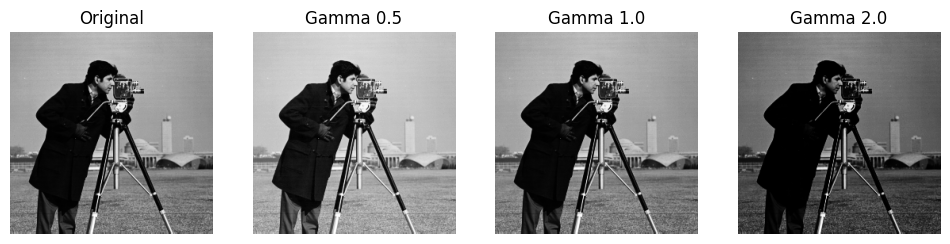

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio
from skimage import color

def gamma_transform(image, gamma):
    image = image.astype(np.float32) / 255.0  # Normalize to [0,1]
    corrected = np.power(image, gamma)  # Apply gamma correction
    return (corrected * 255).astype(np.uint8)  # Convert back to [0,255]

# Load and apply gamma correction to a grayscale image
gray_image = iio.imread("../TestImages/Week 1/cameraman.tif")
gamma_values = [0.5, 1.0, 2.0]

plt.figure(figsize=(12, 4))
plt.subplot(1, len(gamma_values) + 1, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original")
plt.axis("off")

for i, gamma in enumerate(gamma_values):
    corrected = gamma_transform(gray_image, gamma)
    plt.subplot(1, len(gamma_values) + 1, i + 2)
    plt.imshow(corrected, cmap='gray')
    plt.title(f"Gamma {gamma}")
    plt.axis("off")

plt.show()

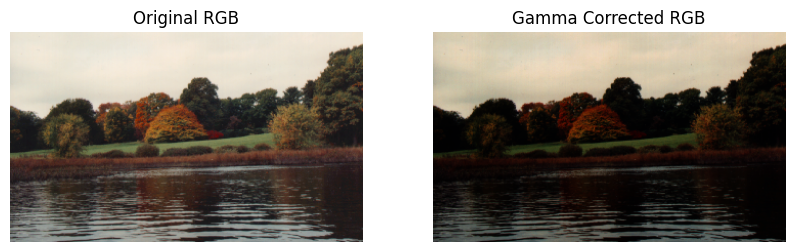

In [8]:
# Function to apply gamma correction to RGB channels separately
def gamma_correct_rgb(image, gamma):
    corrected = np.zeros_like(image, dtype=np.uint8)
    for c in range(3):  # Apply gamma correction on each channel separately
        corrected[..., c] = gamma_transform(image[..., c], gamma)
    return corrected

# Load color image and apply gamma correction
rgb_image = iio.imread("../TestImages/Week 1/autumn.tif")
gamma_corrected_rgb = gamma_correct_rgb(rgb_image, 2.0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_rgb)
plt.title("Gamma Corrected RGB")
plt.axis("off")

plt.show()


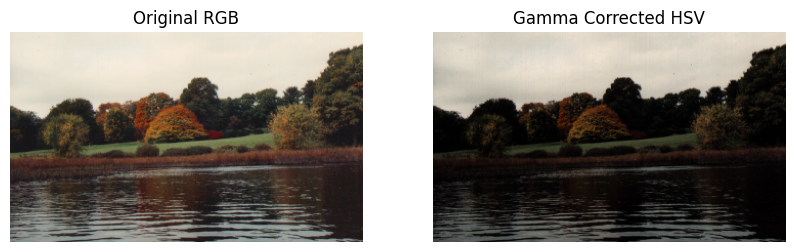

In [6]:

# Function to apply gamma correction in HSV space
def gamma_correct_hsv(image, gamma):
    hsv_image = color.rgb2hsv(image)
    hsv_image[..., 2] = gamma_transform((hsv_image[..., 2] * 255).astype(np.uint8), gamma) / 255.0
    return (color.hsv2rgb(hsv_image) * 255).astype(np.uint8)

# Apply gamma correction to the V-channel in HSV space
gamma_corrected_hsv = gamma_correct_hsv(rgb_image, 2.0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_hsv)
plt.title("Gamma Corrected HSV")
plt.axis("off")

plt.show()